# ANN Model Building

In [76]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [77]:
df = pd.read_csv('pre_processed.csv')
df1 = pd.read_csv('dataset.csv')

### PreProcessed csv

In [78]:
df.head()

abdominal pain   abnormal menstruation   acidity   acute liver failure  \
0                0                       0         0                     0   
1                0                       0         0                     0   
2                0                       1         0                     0   
3                0                       0         0                     0   
4                1                       0         0                     0   

    altered sensorium   anxiety   back pain   belly pain   blackheads  \
0                   0         0           0            0            1   
1                   0         0           0            0            1   
2                   0         0           0            0            0   
3                   0         0           0            0            0   
4                   0         0           0            0            0   

    bladder discomfort  ...   weakness in limbs   weakness of one body side  \
0                    0  ...                   0                           0   
1                    0  ...                   0                           0   
2                    0  ...                   0                           0   
3                    0  ...                   0                           0   
4                    0  ...                   0                           0   

    weight gain   weight loss   yellow crust ooze   yellow urine  \
0             0             0                   0              0   
1             0             0                   0              0   
2             0             1                   0              0   
3             0             0                   0              0   
4             0             0                   0              0   

    yellowing of eyes   yellowish skin  itching              Disease  
0                   0                0        0                 Acne  
1                   0                0        0                 Acne  
2                   0                0        0      Hyperthyroidism  
3                   0                0        0                 AIDS  
4                   1                1        1  Chronic cholestasis  

[5 rows x 132 columns]

### Original csv

In [79]:
df1.head()

Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Symptom_16 Symptom_17  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [80]:
df.describe()

abdominal pain   abnormal menstruation      acidity  \
count      4920.000000             4920.000000  4920.000000   
mean          0.209756                0.048780     0.045122   
std           0.407176                0.215431     0.207593   
min           0.000000                0.000000     0.000000   
25%           0.000000                0.000000     0.000000   
50%           0.000000                0.000000     0.000000   
75%           0.000000                0.000000     0.000000   
max           1.000000                1.000000     1.000000   

        acute liver failure   altered sensorium      anxiety    back pain  \
count           4920.000000         4920.000000  4920.000000  4920.000000   
mean               0.023171            0.023171     0.023171     0.046341   
std                0.150461            0.150461     0.150461     0.210245   
min                0.000000            0.000000     0.000000     0.000000   
25%                0.000000            0.000000     0.000000     0.000000   
50%                0.000000            0.000000     0.000000     0.000000   
75%                0.000000            0.000000     0.000000     0.000000   
max                1.000000            1.000000     1.000000     1.000000   

        belly pain   blackheads   bladder discomfort  ...  \
count  4920.000000  4920.000000          4920.000000  ...   
mean      0.023171     0.021951             0.023171  ...   
std       0.150461     0.146539             0.150461  ...   
min       0.000000     0.000000             0.000000  ...   
25%       0.000000     0.000000             0.000000  ...   
50%       0.000000     0.000000             0.000000  ...   
75%       0.000000     0.000000             0.000000  ...   
max       1.000000     1.000000             1.000000  ...   

        watering from eyes   weakness in limbs   weakness of one body side  \
count          4920.000000         4920.000000                 4920.000000   
mean              0.021951            0.021951                    0.021951   
std               0.146539            0.146539                    0.146539   
min               0.000000            0.000000                    0.000000   
25%               0.000000            0.000000                    0.000000   
50%               0.000000            0.000000                    0.000000   
75%               0.000000            0.000000                    0.000000   
max               1.000000            1.000000                    1.000000   

        weight gain   weight loss   yellow crust ooze   yellow urine  \
count   4920.000000   4920.000000         4920.000000    4920.000000   
mean       0.023171      0.092683            0.023171       0.023171   
std        0.150461      0.290017            0.150461       0.150461   
min        0.000000      0.000000            0.000000       0.000000   
25%        0.000000      0.000000            0.000000       0.000000   
50%        0.000000      0.000000            0.000000       0.000000   
75%        0.000000      0.000000            0.000000       0.000000   
max        1.000000      1.000000            1.000000       1.000000   

        yellowing of eyes   yellowish skin      itching  
count         4920.000000      4920.000000  4920.000000  
mean             0.165854         0.185366     0.137805  
std              0.371987         0.388634     0.344730  
min              0.000000         0.000000     0.000000  
25%              0.000000         0.000000     0.000000  
50%              0.000000         0.000000     0.000000  
75%              0.000000         0.000000     0.000000  
max              1.000000         1.000000     1.000000  

[8 rows x 131 columns]

In [81]:
Y = df['Disease']

#### Ecoding the target label 

In [82]:
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = np_utils.to_categorical(Y)
Y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [83]:
x = df.drop('Disease',axis=1)

In [84]:
x

abdominal pain   abnormal menstruation   acidity   acute liver failure  \
0                   0                       0         0                     0   
1                   0                       0         0                     0   
2                   0                       1         0                     0   
3                   0                       0         0                     0   
4                   1                       0         0                     0   
...               ...                     ...       ...                   ...   
4915                0                       0         0                     0   
4916                1                       0         0                     0   
4917                0                       0         0                     0   
4918                0                       0         0                     0   
4919                0                       0         0                     0   

       altered sensorium   anxiety   back pain   belly pain   blackheads  \
0                      0         0           0            0            1   
1                      0         0           0            0            1   
2                      0         0           0            0            0   
3                      0         0           0            0            0   
4                      0         0           0            0            0   
...                  ...       ...         ...          ...          ...   
4915                   0         0           0            0            0   
4916                   0         0           0            0            0   
4917                   0         0           1            0            0   
4918                   0         0           0            0            0   
4919                   0         0           0            0            0   

       bladder discomfort  ...   watering from eyes   weakness in limbs  \
0                       0  ...                    0                   0   
1                       0  ...                    0                   0   
2                       0  ...                    0                   0   
3                       0  ...                    0                   0   
4                       0  ...                    0                   0   
...                   ...  ...                  ...                 ...   
4915                    0  ...                    0                   0   
4916                    0  ...                    0                   0   
4917                    0  ...                    0                   0   
4918                    0  ...                    0                   0   
4919                    0  ...                    0                   0   

       weakness of one body side   weight gain   weight loss  \
0                              0             0             0   
1                              0             0             0   
2                              0             0             1   
3                              0             0             0   
4                              0             0             0   
...                          ...           ...           ...   
4915                           0             0             0   
4916                           0             0             0   
4917                           0             0             0   
4918                           0             0             0   
4919                           0             0             0   

       yellow crust ooze   yellow urine   yellowing of eyes   yellowish skin  \
0                      0              0                   0                0   
1                      0              0                   0                0   
2                      0              0                   0                0   
3                      0              0                   0                0   
4                      0              0            

In [85]:
df['Disease'].unique().sum()

'AcneHyperthyroidismAIDSChronic cholestasisHypertension HypoglycemiaArthritisHepatitis BMigraineUrinary tract infectionDiabetes Hepatitis DPsoriasisAlcoholic hepatitisDimorphic hemmorhoids(piles)Hepatitis ECervical spondylosisBronchial Asthmahepatitis AAllergyHepatitis CPneumoniaHypothyroidismGastroenteritisVaricose veinsJaundiceDrug Reaction(vertigo) Paroymsal  Positional VertigoHeart attackTuberculosisTyphoidCommon ColdPeptic ulcer diseaeParalysis (brain hemorrhage)Fungal infectionImpetigoGERDDengueMalariaChicken poxOsteoarthristis'

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30, random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3444, 131)
(3444, 41)
(1476, 131)
(1476, 41)


#### Model Building <br/>
basic ann with 4 layers

In [88]:
import keras 
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential


In [89]:
model = Sequential()
model.add(Dense(16, input_shape = (131,) , activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(41, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'] )

history = model.fit(X_train, y_train, epochs = 15 , batch_size=256,validation_split=0.2, shuffle=True)

scores = model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/15
11/11 [==============================] - 0s 15ms/step - loss: 3.6970 - acc: 0.0417 - val_loss: 3.6620 - val_acc: 0.0885
Epoch 2/15
11/11 [==============================] - 0s 4ms/step - loss: 3.6404 - acc: 0.0958 - val_loss: 3.6011 - val_acc: 0.1480
Epoch 3/15
11/11 [==============================] - 0s 5ms/step - loss: 3.5756 - acc: 0.1648 - val_loss: 3.5199 - val_acc: 0.2061
Epoch 4/15
11/11 [==============================] - 0s 4ms/step - loss: 3.4869 - acc: 0.1793 - val_loss: 3.4057 - val_acc: 0.1959
Epoch 5/15
11/11 [==============================] - 0s 6ms/step - loss: 3.3685 - acc: 0.1633 - val_loss: 3.2552 - val_acc: 0.2119
Epoch 6/15
11/11 [==============================] - 0s 5ms/step - loss: 3.2173 - acc: 0.1713 - val_loss: 3.0793 - val_acc: 0.2032
Epoch 7/15
11/11 [==============================] - 0s 4ms/step - loss: 3.0469 - acc: 0.1601 - val_loss: 2.8880 - val_acc: 0.2017
Epoch 8/15
11/11 [==============================] - 0s 6ms/step - loss: 2.8568 - acc: 0.1

In [90]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 16)                2112      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_66 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_67 (Dense)             (None, 41)                697       
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


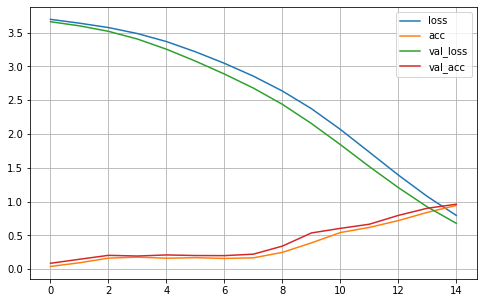

In [91]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

traing on stratify data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30, random_state=1, stratify=Y)

In [93]:
type(y_train)
b = np.sum(y_train,axis=0)
b

array([84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84., 84.,
       84., 84.], dtype=float32)

In [96]:
model1 = Sequential()
model1.add(Dense(16, input_shape = (131,) , activation = 'relu'))
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(41, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'] )

history1=model1.fit(X_train, y_train, epochs = 15,batch_size=256 ,validation_split=0.2, shuffle=True)

scores = model1.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

Epoch 1/15
11/11 [==============================] - 0s 16ms/step - loss: 3.6958 - acc: 0.0574 - val_loss: 3.6759 - val_acc: 0.0856
Epoch 2/15
11/11 [==============================] - 0s 5ms/step - loss: 3.6540 - acc: 0.1405 - val_loss: 3.6346 - val_acc: 0.1480
Epoch 3/15
11/11 [==============================] - 0s 5ms/step - loss: 3.6034 - acc: 0.2029 - val_loss: 3.5787 - val_acc: 0.2206
Epoch 4/15
11/11 [==============================] - 0s 4ms/step - loss: 3.5322 - acc: 0.2621 - val_loss: 3.4976 - val_acc: 0.2496
Epoch 5/15
11/11 [==============================] - 0s 5ms/step - loss: 3.4287 - acc: 0.3013 - val_loss: 3.3825 - val_acc: 0.3048
Epoch 6/15
11/11 [==============================] - 0s 5ms/step - loss: 3.2844 - acc: 0.3358 - val_loss: 3.2237 - val_acc: 0.3091
Epoch 7/15
11/11 [==============================] - 0s 5ms/step - loss: 3.0916 - acc: 0.3408 - val_loss: 3.0165 - val_acc: 0.3179
Epoch 8/15
11/11 [==============================] - 0s 6ms/step - loss: 2.8524 - acc: 0.3

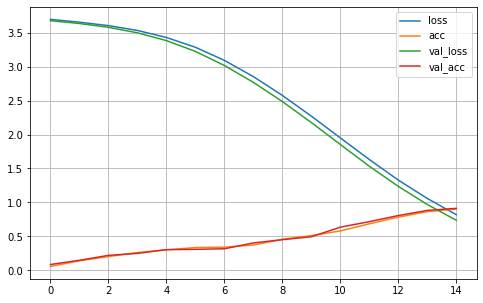

In [97]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()